# Install Deps

In [ ]:
!pip install nmigen
!pip install yowasp-yosys
!npm i -g netlistsvg


/tools/node/bin/netlistsvg -> /tools/node/lib/node_modules/netlistsvg/bin/netlistsvg.js
/tools/node/bin/netlistsvg-dumplayout -> /tools/node/lib/node_modules/netlistsvg/bin/exportLayout.js
+ netlistsvg@1.0.2
updated 1 package in 1.778s


# Imports

In [ ]:
from nmigen import *
from nmigen.back import rtlil
from IPython.display import SVG, display

# Schematic Renderer

In [ ]:
def render_schematic(design, ports):
  with open("out.il", "w") as f:
      f.write(rtlil.convert(design, ports=ports))
  !yowasp-yosys -q -p "prep -flatten; write_json out.json" out.il
  !netlistsvg out.json
  with open('out.svg') as f:
    display(SVG(f.read()))

# nMigen Design

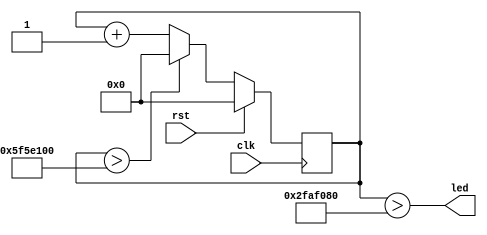

In [ ]:
class Counter(Elaboratable):
    def __init__(self, limit=100_000_000):
        # parameters
        self.limit = limit
        # io
        self.led = Signal()

    def ports(self):
        return [self.led]

    def elaborate(self, platform):
        m = Module()
        if platform:
            m.d.comb += platform.request('led').o.eq(self.led)
        count = Signal(27)
        m.d.comb += self.led.eq(count > self.limit // 2)
        with m.If(count > self.limit):
            m.d.sync += count.eq(0)
        with m.Else():
            m.d.sync += count.eq(count + 1)
        return m

design = Counter()
render_schematic(design, design.ports())
